1
1
this bus is not 54


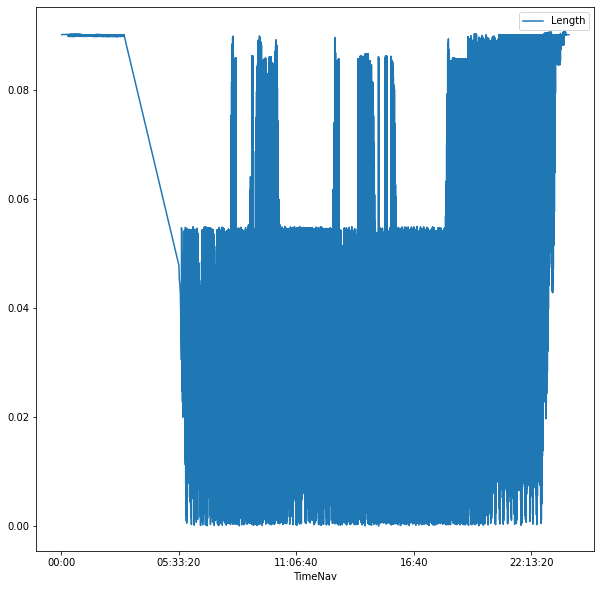

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv('Data/Buses.csv')
#data = pd.read_csv('Data/Buses.csv', sep = ',',)

#Берем определенный маршрут: в данном случае 54.
dataBus54 = data[:][(data.Marsh == '54')]

#Размечаем временной формат.
dataBus54['TimeNav'] = pd.to_datetime(data['TimeNav'], format='%H:%M:%S').dt.time

#Добавляем столбец расстояния от остановки "университет".
dataBus54['Length'] = ((data['Latitude'] - 55.793360) ** 2 + (data['Longitude'] - 49.124769)**2)**0.5

#Строим график расстояния от времени.
dataBus54[['TimeNav', 'Length']].plot( x='TimeNav', y ='Length', figsize=(10, 10))

#Все случаи, когда автобус стоял на остановке.
busStop54 = data[:][
    (data.Marsh == '54') & (data.Latitude<55.7934) & 
    (data.Latitude > 55.7930) & (data.Longitude < 49.1346) & (data.Longitude > 49.1146)]
#print(busStop54)

#maxlength = float(dataBus54['Length'].max)

#Принимаем данные местоположения.
latitude = float(input())
longitude = float(input())

length = ((latitude - 55.793360) ** 2 + (longitude - 49.124769) ** 2) ** 0.5
if length < dataBus54['Length'].max():
    print('Вероятность нахождения автобуса на остановке: {}%'.format((1 - (length / dataBus54['Length'].max()))*100))
else :
    print("this bus is not 54")

#data[['Longitude',]][(data.Speed == 0) & (data.Marsh == '54')].plot(figsize=(10, 10), color = ['green', 'red'])
#data[['Latitude',]][(data.Speed == 0) & (data.Marsh == '54')].plot(figsize=(10, 10), color = ['orange', 'red'])

#print(data.loc[0:1,['Speed']])